In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from ikapati.data import io
from ikapati.visualization import visualize

In [9]:
species = "Corn"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")
base_dir = pathlib.Path.cwd()

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Corn - train_dir: ../data/processed/Corn - metadata_file_path: ../data/processed/Corn/metadata.json


In [10]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: e9257664-a467-43e8-8f15-9088131293f9


In [11]:
training_log_path = model_dir.joinpath(model_id, "training.log")

with open(training_log_path) as log_file:
    logs = log_file.readlines()
    training_logs = dict([log.strip().split("\t") for log in logs])
    
training_logs

{'relu': 'models/e9257664-a467-43e8-8f15-9088131293f9/2020-02-03__01_0305',
 'relu-dropout': 'models/e9257664-a467-43e8-8f15-9088131293f9/2020-02-03__01_0434'}

In [12]:
list(pathlib.Path("../models", model_id).glob("*/"))

[PosixPath('../models/e9257664-a467-43e8-8f15-9088131293f9/2020-02-03__01_0305'),
 PosixPath('../models/e9257664-a467-43e8-8f15-9088131293f9/2020-02-03__01_0434'),
 PosixPath('../models/e9257664-a467-43e8-8f15-9088131293f9/training.log')]

## ReLU

In [13]:
model_metadata_file_path = pathlib.Path("..", training_logs["relu"], "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [14]:
model_metadata

{'id': 'e9257664-a467-43e8-8f15-9088131293f9',
 'start_time': '2020-02-03__01_0305',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet',
  'dropout': False},
 'dataset': {'id': 'e9257664-a467-43e8-8f15-9088131293f9',
  'species': 'Corn',
  'num_classes': 4,
  'class_names': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
   'Corn_(maize)___Common_rust_',
   'Corn_(maize)___Northern_Leaf_Blight',
   'Corn_(maize)___healthy'],
  'created_date': '2020-02-02 23:11:39',
  'file_counts': {'train': 2023, 'test': 253, 'eval': 253}},
 'history': {'loss': [0.9321761679264807,
   0.44799183453283004,
   0.38777408099943594,
   0.38636701626162373,
   0.3172011452336465,
   0.30175033307844595,
   0.26333783951497847,
   0.2561584009278205,
   0.16920591434163432,
   0.1743548749194991,
   0.1865305085816691,
   0.1760518135082337,
   0.1895304884641401,
   0.15667798706600744,
   0.1293140

In [15]:
history = model_metadata["history"]

In [16]:
metrics_df = visualize.create_metrics_dataframe(history)

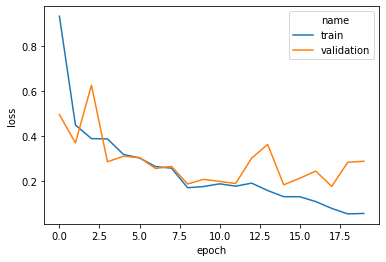

In [17]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [18]:
visualize.save_plot(loss_plot, f"../reports/figures/{species}-relu.loss.png")

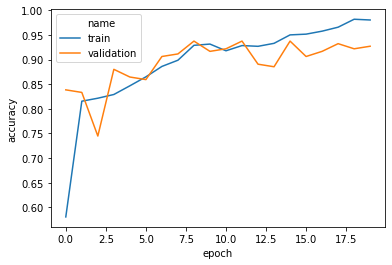

In [19]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [20]:
visualize.save_plot(accuracy_plot, f"../reports/figures/{species}-relu.accuracy.png")

## ReLU with Dropout

In [21]:
dropout_model_metadata_file_path = pathlib.Path("..", training_logs["relu-dropout"], "metadata.json")
dropout_model_metadata = io.read_metadata(str(dropout_model_metadata_file_path))

In [22]:
dropout_model_metadata

{'id': 'e9257664-a467-43e8-8f15-9088131293f9',
 'start_time': '2020-02-03__01_0434',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet',
  'dropout': True},
 'dataset': {'id': 'e9257664-a467-43e8-8f15-9088131293f9',
  'species': 'Corn',
  'num_classes': 4,
  'class_names': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
   'Corn_(maize)___Common_rust_',
   'Corn_(maize)___Northern_Leaf_Blight',
   'Corn_(maize)___healthy'],
  'created_date': '2020-02-02 23:11:39',
  'file_counts': {'train': 2023, 'test': 253, 'eval': 253}},
 'history': {'loss': [0.9585084972843048,
   0.43047957266530684,
   0.3844163562020948,
   0.3465425665340116,
   0.30663932859897614,
   0.26569015989380496,
   0.2020925384375357,
   0.22196342026995075,
   0.16854176790483535,
   0.1073117712813039,
   0.1612251535538704,
   0.08954074386987955,
   0.19101359899486264,
   0.1523195783938131,
   0.08143218

In [23]:
dropout_history = dropout_model_metadata["history"]

In [24]:
dropout_metrics_df = visualize.create_metrics_dataframe(dropout_history)

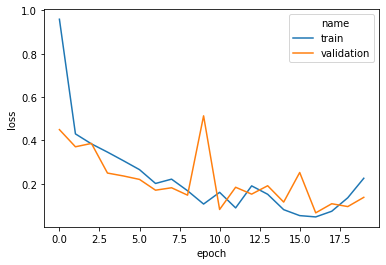

In [25]:
dropout_loss_plot = visualize.learning_curves("loss", dropout_metrics_df)

In [26]:
visualize.save_plot(dropout_loss_plot, f"../reports/figures/{species}-relu-dropout.loss.png")

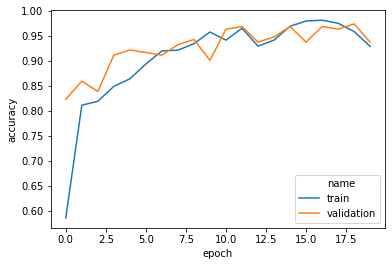

In [27]:
dropout_accuracy_plot = visualize.learning_curves("accuracy", dropout_metrics_df)

In [23]:
visualize.save_plot(dropout_accuracy_plot, f"../reports/figures/{species}-relu.accuracy.png")